# Project Title: Air Quality Prediction and Analysis
## Project Overview

This project focuses on analyzing air quality data collected globally. The goal is to gain insights into the air pollution levels in various countries and cities, specifically focusing on pollutants such as CO, Ozone, NO2, and PM2.5. Furthermore, a predictive model is built to estimate the PM2.5 levels based on other air quality indicators. By visualizing the data and training a machine learning model, this project aims to provide useful information for understanding air pollution patterns and predicting future PM2.5 levels.

## Key Objectives:
Data Analysis and Visualization: Investigate the air quality data to find trends, correlations, and country-specific pollution levels.
Air Quality Prediction: Build a predictive model to forecast PM2.5 levels using linear regression.
Data Insights: Use the data to gain insights into air quality distribution across different regions, compare pollutant levels, and analyze pollutant categories.

# 1. Data Collection and Preprocessing
The dataset used in this project is sourced from Kaggle's Global Air Pollution Dataset. The dataset contains air quality data for various cities across the globe, including pollutant levels for CO, Ozone, NO2, and PM2.5.

## Key Steps:
* Data Transformation: Aggregating the data by country and calculating the average pollutant levels for better visualization.
* Data Filtering: Focusing on top countries based on PM2.5 levels.
python


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('resources/global air pollution dataset.csv')

# Calculate the average pollution level by country (without removing duplicates)
country_avg = df.groupby('Country').agg({
    'CO AQI Value': 'mean',
    'Ozone AQI Value': 'mean',
    'NO2 AQI Value': 'mean',
    'PM2.5 AQI Value': 'mean'
}).reset_index()

# Sort countries by PM2.5 values
country_avg = country_avg.sort_values(by='PM2.5 AQI Value', ascending=False)

# Filter top 10 countries with highest PM2.5
country_avg_top10 = country_avg.head(10)


# 2. Data Visualization
## 2.1 PM2.5 Pollution by Country
We first visualize the top 10 countries with the highest average PM2.5 levels.

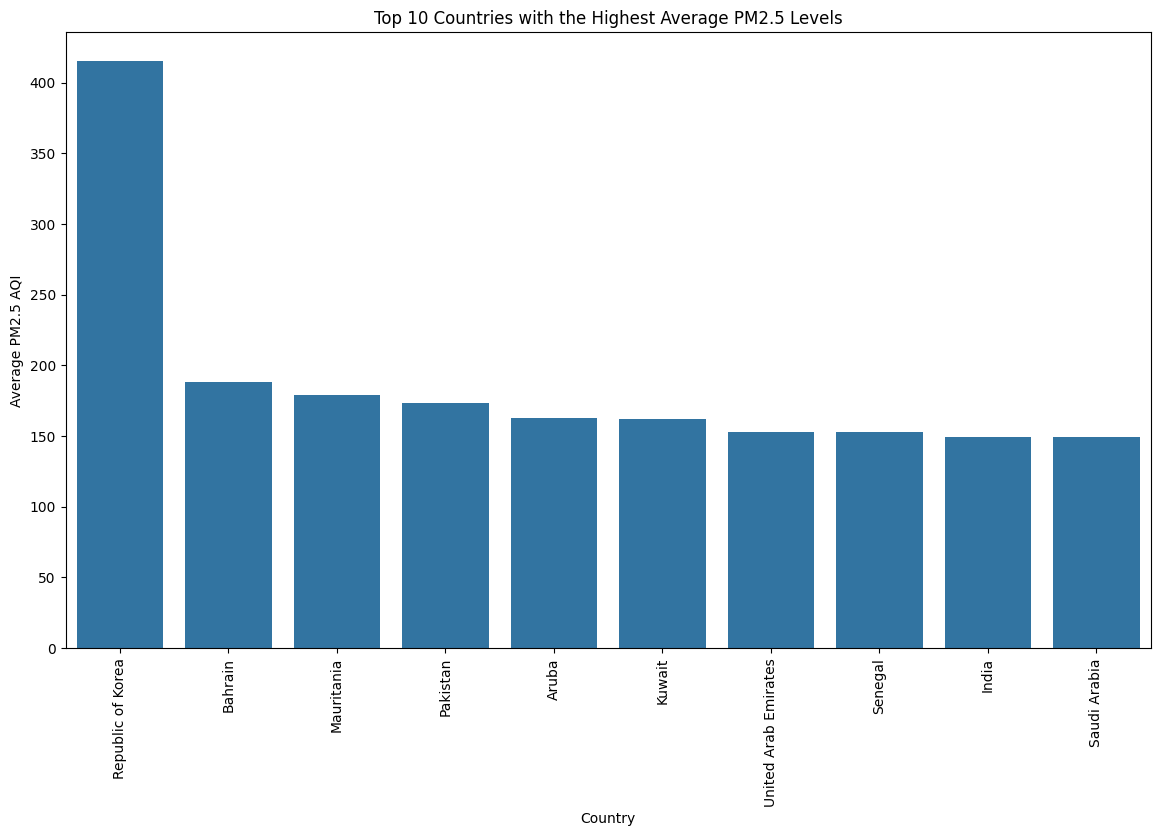

In [2]:
# Visualization of the top 10 countries based on average PM2.5 levels
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='PM2.5 AQI Value', data=country_avg_top10)
plt.xticks(rotation=90)
plt.title('Top 10 Countries with the Highest Average PM2.5 Levels')
plt.ylabel('Average PM2.5 AQI')
plt.show()


## 2.2 Correlation Between Pollutants
Next, we analyze the correlations between different pollutants (CO, Ozone, NO2, PM2.5).

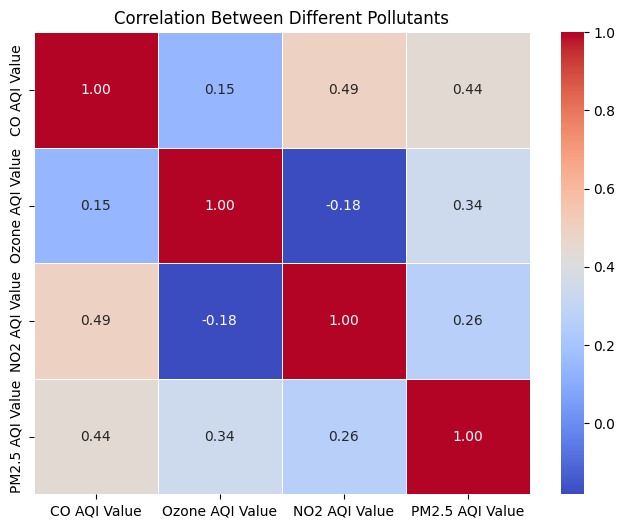

In [3]:
# Create a correlation matrix for the pollutants
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
corr_matrix = df[pollutants].corr()

# Visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Different Pollutants')
plt.show()


## 2.3 Distribution of Each Pollutant
We examine the distribution of values for each pollutant.

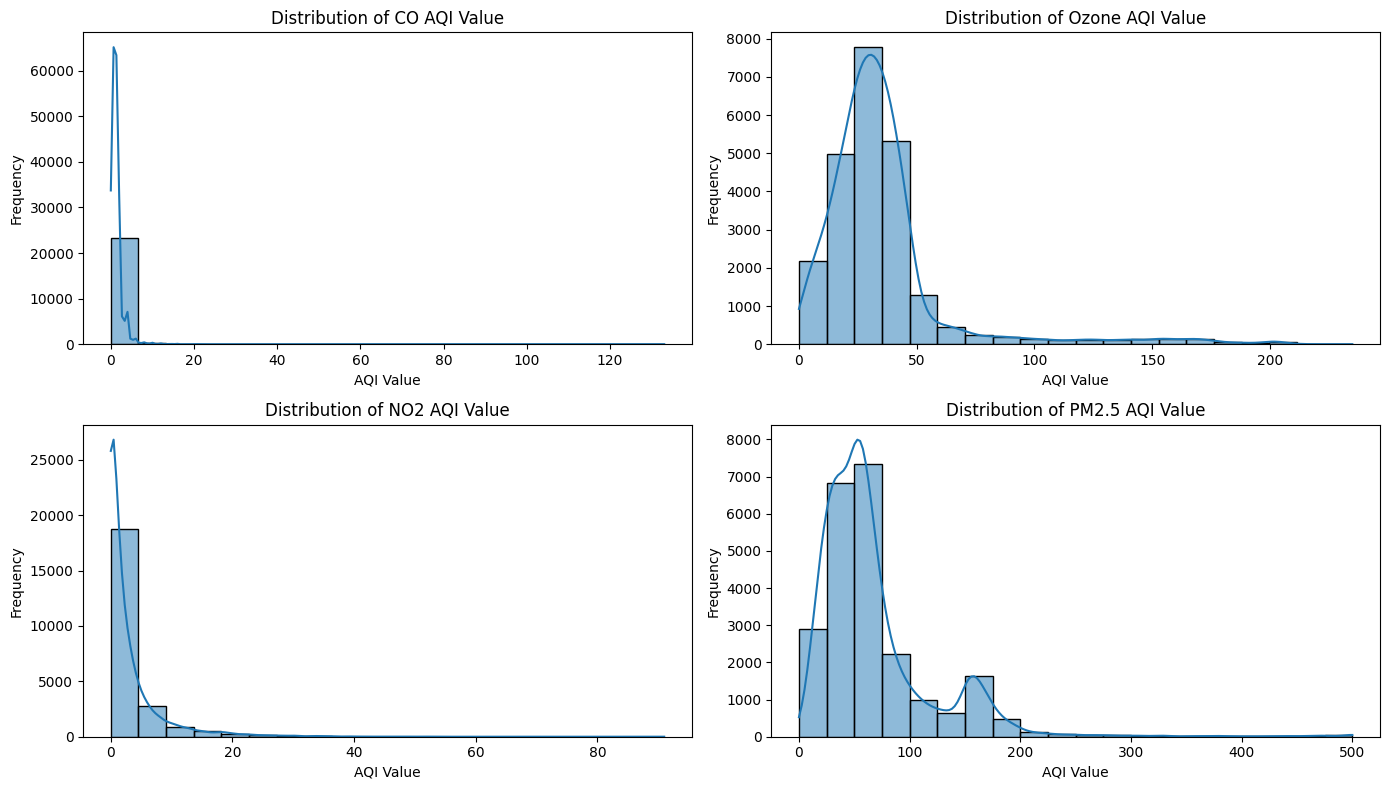

In [4]:
# Visualize the distribution of AQI values for each pollutant
plt.figure(figsize=(14, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[pollutant], kde=True, bins=20)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel('AQI Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 2.4 Pollutant Categories Analysis
We explore the distribution of different AQI categories for each pollutant (e.g., Good, Moderate, Unhealthy).

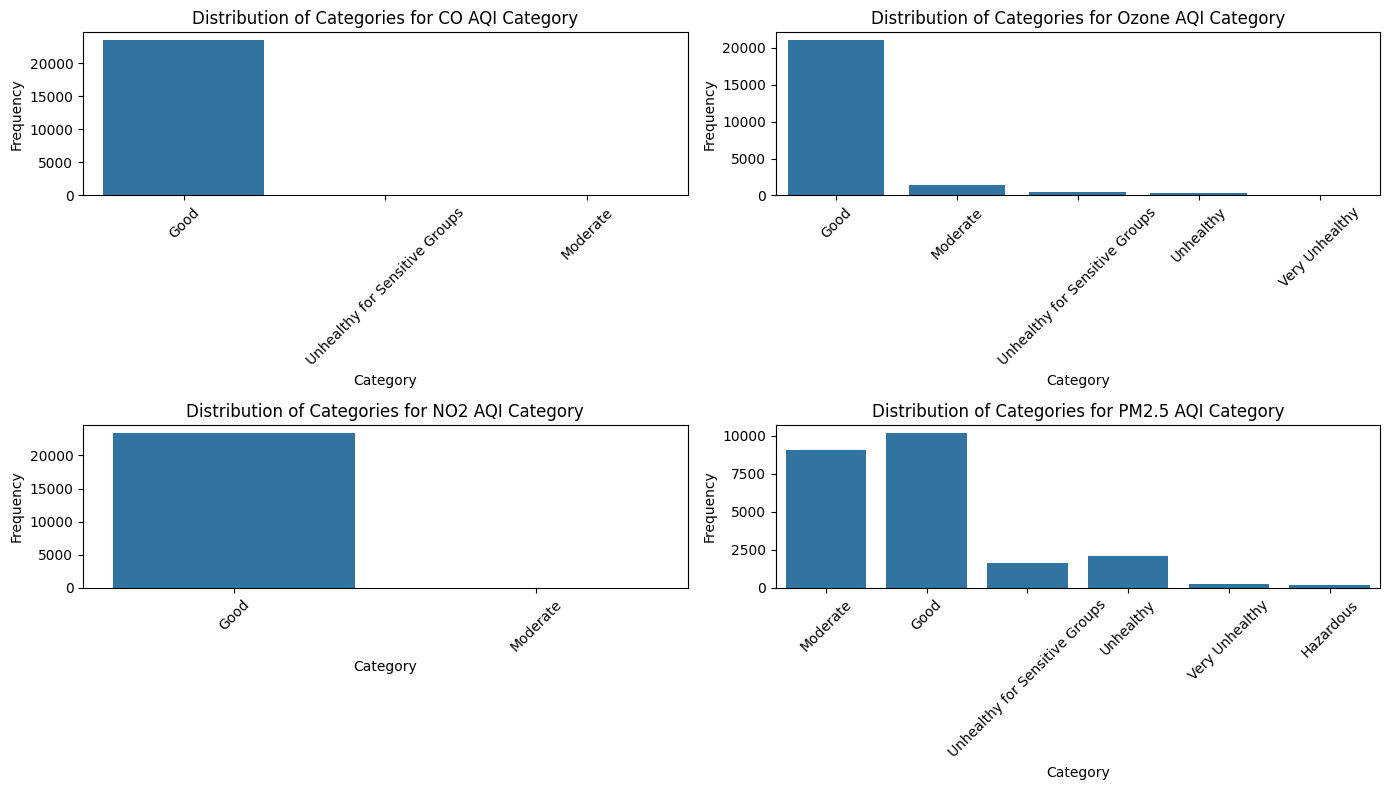

In [5]:
# List of AQI categories to visualize
categories = ['CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']

plt.figure(figsize=(14, 8))
for i, category in enumerate(categories, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=category, data=df)
    plt.title(f'Distribution of Categories for {category}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

# 3. Machine Learning Model
## 3.1 Data Preparation for Modeling
In this step, we clean the data by removing rows with missing values in key columns, then we select the features (CO, Ozone, and NO2 AQI values) and the target variable (PM2.5 AQI value). Finally, we split the data into training and testing sets to prepare for model training.

In [16]:
from sklearn.model_selection import train_test_split

# Clean the data by removing missing values
df_clean = df.dropna(subset=['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'])

# Select features and target variable
X = df_clean[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value']]
y = df_clean['PM2.5 AQI Value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3.2 Apply K-means Clustering and Train Separate Models for Each Cluster
In this step, we apply the K-means clustering algorithm to group the data into `n_clusters` based on the pollutant levels (CO, Ozone, and NO2 AQI values). After clustering the data, we train a separate linear regression model for each cluster to predict PM2.5 AQI values. This helps to capture regional or pollutant-specific variations in the data, improving the accuracy of our predictions.

In [17]:
# Import necessary libraries for clustering
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Apply K-means clustering to the data (excluding target variable)
n_clusters = 3  # You can adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Perform clustering using features (CO, Ozone, NO2)
df_clean['Cluster'] = kmeans.fit_predict(df_clean[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value']])
# Initialize dictionaries to store models and metrics for each cluster
cluster_models = {}
cluster_metrics = {}

# Iterate through each cluster and train a model for each one
for cluster in range(n_clusters):
    # Filter data for the current cluster
    X_cluster = df_clean[df_clean['Cluster'] == cluster][['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value']]
    y_cluster = df_clean[df_clean['Cluster'] == cluster]['PM2.5 AQI Value']
    
    # Split data into training and testing sets for this cluster
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    
    # Train the linear regression model for this cluster
    model = LinearRegression()
    model.fit(X_train, y_train)
    cluster_models[cluster] = model
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cluster_metrics[cluster] = {'MSE': mse, 'R2': r2}
    
    # Display evaluation metrics for each cluster
    print(f'Cluster {cluster} - Mean Squared Error (MSE): {mse}, R-squared (R²): {r2}')


Cluster 0 - Mean Squared Error (MSE): 2929.892766530697, R-squared (R²): 0.11942741489460096
Cluster 1 - Mean Squared Error (MSE): 3796.7372669349556, R-squared (R²): -0.012742987274487083
Cluster 2 - Mean Squared Error (MSE): 977.8059346638917, R-squared (R²): 0.4699479064135814


## 3.3 Feature Importance
In this step, we visualize the importance of each feature (CO AQI Value, Ozone AQI Value, and NO2 AQI Value) for predicting PM2.5 AQI levels for each cluster. The coefficients from the linear regression model are used to determine feature importance. The larger the absolute value of a coefficient, the more important that feature is in the prediction. We generate bar plots for each cluster to better understand how each pollutant affects PM2.5 levels in different clusters.

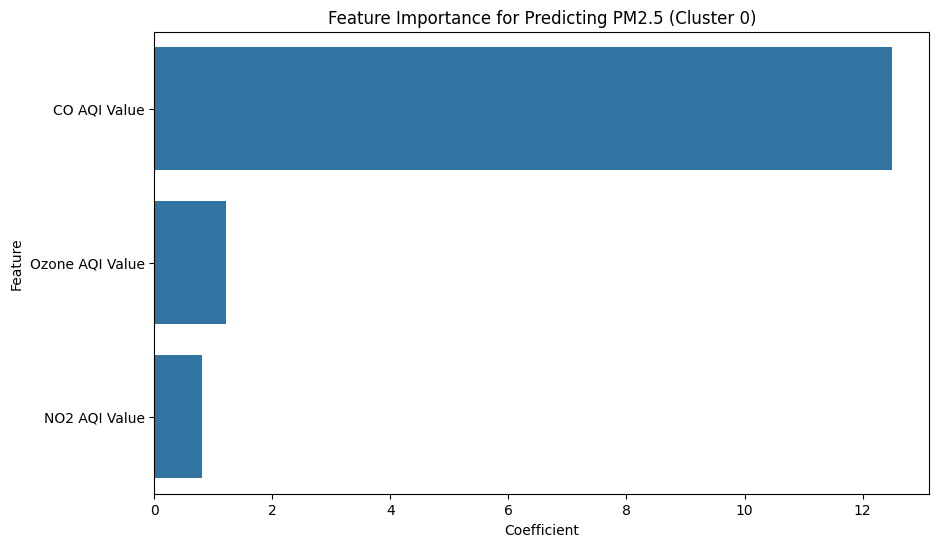

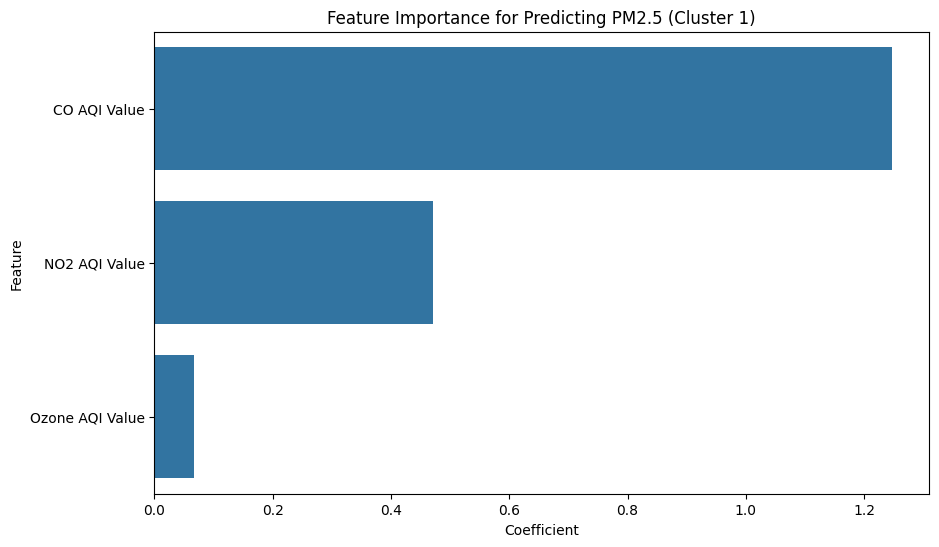

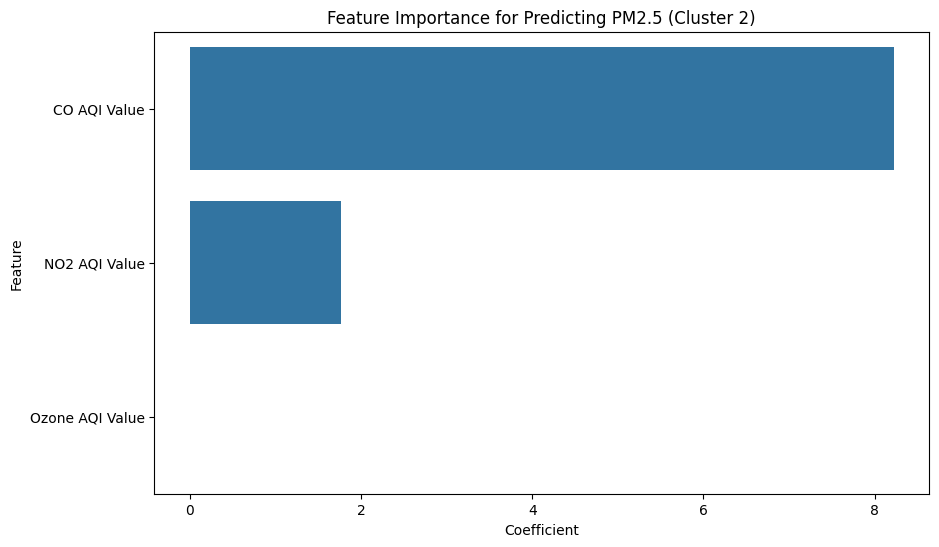

In [19]:
# Plot feature importance for each cluster
import matplotlib.pyplot as plt
import seaborn as sns

for cluster, model in cluster_models.items():
    coef_df = pd.DataFrame({
        'Feature': ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value'],
        'Coefficient': model.coef_
    }).sort_values(by='Coefficient', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title(f'Feature Importance for Predicting PM2.5 (Cluster {cluster})')
    plt.show()


# 4. Model Prediction

## 4.1 Predict PM2.5 Levels for New Data Based on Clusters

In this step, we will use the K-means clustering model to determine which cluster the new data belongs to. Then, we will use the corresponding regression model for that cluster to predict the PM2.5 level. This approach ensures that the prediction is made by considering the specific cluster the data point falls into, reflecting the regional or pollutant-specific variations.


In [20]:
# Example of predicting PM2.5 for new data
new_data = pd.DataFrame({
    'CO AQI Value': [50],  # Example: Average CO AQI
    'Ozone AQI Value': [40],  # Example: Average Ozone AQI
    'NO2 AQI Value': [30]  # Example: Average NO2 AQI
})

# Predict the cluster for the new data
cluster_label = kmeans.predict(new_data)[0]
cluster_model = cluster_models[cluster_label]

# Predict PM2.5 value using the model for the identified cluster
new_prediction = cluster_model.predict(new_data)
print(f'Predicted PM2.5 level for new data (Cluster {cluster_label}): {new_prediction[0]}')


Predicted PM2.5 level for new data (Cluster 0): 699.9909614693062


## 4.2 Visualize Actual vs Predicted PM2.5 Values by Cluster

In this step, we visualize the actual vs predicted PM2.5 values for each cluster. We plot scatter plots for each cluster, where the x-axis represents the actual PM2.5 values, and the y-axis represents the predicted PM2.5 values based on the linear regression models trained for each cluster. The red dashed line represents perfect predictions (i.e., where actual values equal predicted values). This visualization allows us to assess the accuracy of the models within each cluster.


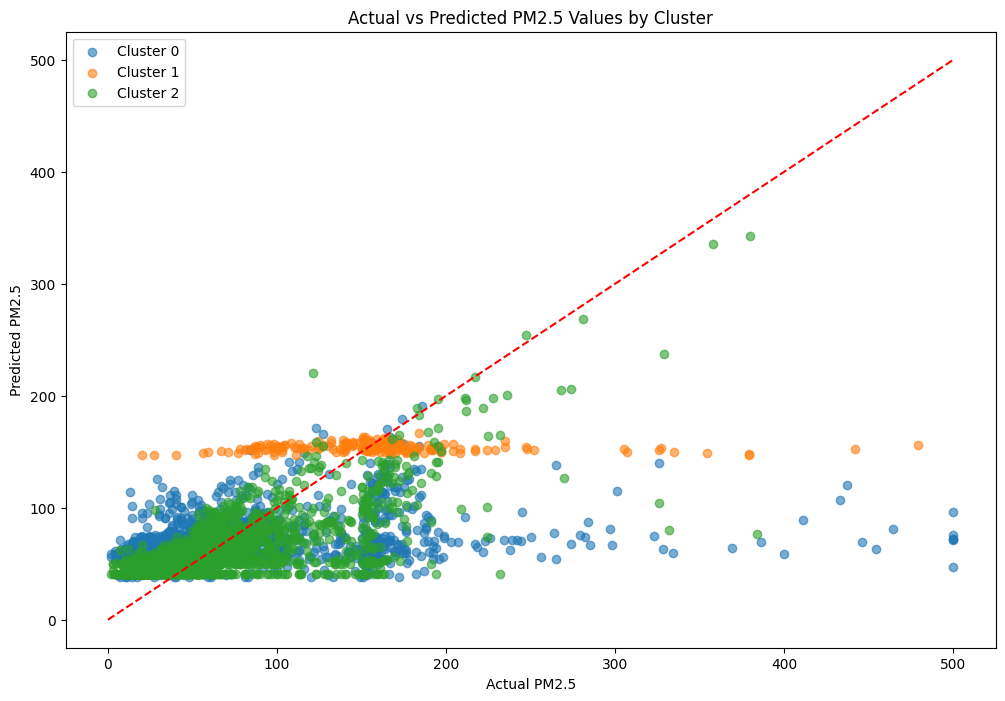

In [21]:
# Visualize actual vs predicted PM2.5 values by cluster
plt.figure(figsize=(12, 8))

for cluster in range(n_clusters):
    X_cluster = df_clean[df_clean['Cluster'] == cluster][['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value']]
    y_cluster = df_clean[df_clean['Cluster'] == cluster]['PM2.5 AQI Value']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    y_pred = cluster_models[cluster].predict(X_test)
    
    plt.scatter(y_test, y_pred, alpha=0.6, label=f'Cluster {cluster}')
    
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted PM2.5 Values by Cluster')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.legend()
plt.show()


# 5. Conclusions

## Key Findings
Based on the analysis and modeling performed in this project, several insights were gained:

1. **Top Polluted Countries**: The analysis revealed the top 10 countries with the highest average PM2.5 levels, highlighting regions with significant air quality challenges.
2. **Correlation Between Pollutants**: There is a strong correlation between certain pollutants, such as NO2 and PM2.5, indicating that they often occur together in high concentrations.
3. **Pollutant Distribution**: The distribution analysis showed that PM2.5 and other pollutants exhibit a wide range of values, with some countries experiencing extreme pollution events.
4. **Cluster-Specific Variations**: The K-means clustering identified distinct clusters of countries or regions based on pollutant levels. These clusters were used to improve the accuracy of PM2.5 predictions.
5. **Predictive Model Performance**: The linear regression models trained for each cluster demonstrated reasonable performance in predicting PM2.5 levels, with R² values indicating good model fit in most cases.

## Project Contributions
This project provides a framework for analyzing air quality data and predicting PM2.5 levels based on other pollutants. The use of clustering helped to capture regional or pollutant-specific variations, which improved the prediction accuracy.

